# Bank Customer Churn Prediction

The goal of this project is to analyze bank customer demographics and financial data — such as age, gender, country, credit score, and account balance — to predict whether a customer is likely to leave the bank (churn) or stay. This helps the bank identify at-risk customers and take proactive measures to improve retention.

## Dataset Overview

The dataset, sourced from Kaggle, contains 10,000 records and 14 features. Its purpose is to predict whether a customer will leave the bank (churn) based on demographic and financial attributes.

- **Independent Variables**: Include factors such as age, gender, country, credit score, balance, etc., which may influence a customer's decision.

- **Dependent Variable**: Indicates whether the customer has exited the bank (0 = No, 1 = Yes).

## Data Dictionary



| Column Name       | Description                                                                 |
|-------------------|-----------------------------------------------------------------------------|
| **RowNumber**     | Row index in the dataset                                                    |
| **CustomerId**    | Unique identification key for each customer                                |
| **Surname**       | Customer’s last name                                                        |
| **CreditScore**   | Credit score of the customer                                                |
| **Geography**     | Country where the customer resides                                          |
| **Age**           | Age of the customer                                                         |
| **Tenure**        | Number of years the customer has been with the bank                         |
| **Balance**       | Current account balance                                                     |
| **NumOfProducts** | Number of bank products the customer uses                                  |
| **HasCrCard**     | 1 if the customer owns a credit card, else 0                                |
| **IsActiveMember**| 1 if the customer is an active member, else 0                               |
| **EstimatedSalary**| Estimated yearly salary of the customer (in USD)                           |
| **Exited**        | 1 if the customer closed their account, 0 if still active (target variable) |


In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"\Users\Mansi\Downloads\churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preprocessing 1

In [3]:
#checking the shape of the dataset
df.shape

(10000, 14)

Dropping the unecessary columns - RowNumber, CustomerId, Surname

In [3]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)

Checking for Null/Missing values

In [4]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Check data type
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

Rename exsited column name as churn

In [7]:
#rename column
df.rename(columns={'Exited':'Churn'}, inplace=True)

Descriptive Statistics

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Explorative Data Analysis


In the exploratory data analysis, I will be looking at the distribution of the data, the coorelation between features and the target variable and the relationship between the features and the target variable. I will start by looking at the distribution of the data, followed by the relationship between the features and the target variable.

## Churn customer percentage

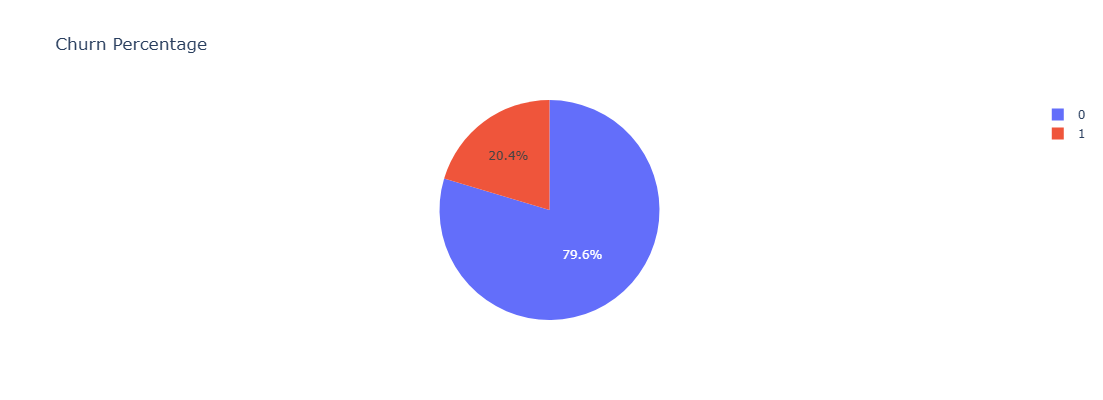

In [37]:
fig = px.pie(data_frame= df,names='Churn',title='Churn Percentage', width=600,  
    height=400  )
fig.show()
plt.show()

Most customers are satisfied and continue banking, but a notable portion — one in five — is leaving.
- Out of all the bank’s customers, **79.6%** continue their relationship with the bank.
- The remaining **20.4%** have chosen to leave — this is what we call customer churn.
- Put another way: for every 10 customers, about 8 stay loyal, while 2 decide to leave.

## Gender-wise Customer Distribution

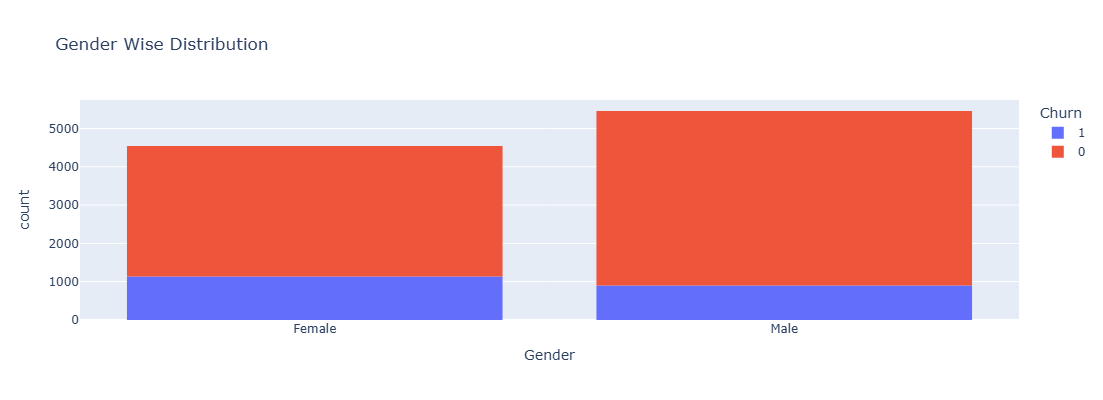

In [45]:
fig = px.histogram(data_frame=df,x='Gender',color='Churn',title='Gender Wise Distribution', width=600,  
    height=400)
fig.show()

- The majority of customers are male, making up the larger portion of the bank’s customer base.

- When we look at customer churn, we notice that female customers show a slightly higher tendency to leave compared to male customers.

- However, the difference in churn between genders is small, meaning gender alone does not strongly explain why customers leave.

- In plain terms: Most customers are men, women churn a little more, but the gap is not big enough to conclude that gender is a key driver of churn.

## Age Segmentation of Bank Customers

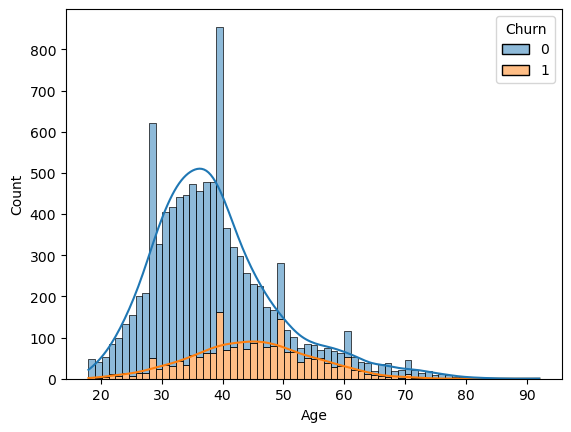

In [47]:

#histogram for age distribution
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack",kde=True)
plt.show()

This histtogram visualizes the age distribution and the churn count of the customers. The majority of the customers are from age group 30-40 years old. However the customer churn count is highest for the customersof age 40 and 50. In addition to that customers from age group 20-25 years old count for the lowest churn count. Therefore, age plays a significant role in customer churn, where late adults are more likely to churn as compared to young adults with minimal churn count.

## Credit Score Distribution and Churn Risk

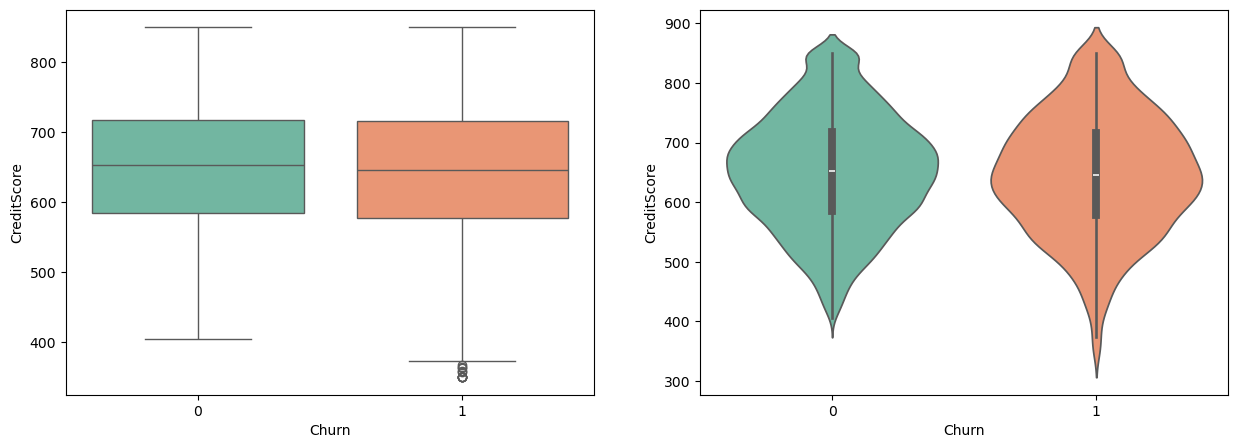

In [53]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Churn", y="CreditScore", data=df, ax=ax[0],palette="Set2")
sns.violinplot(x="Churn", y="CreditScore", data=df, ax=ax[1],palette="Set2")
plt.show()

The boxplot and violinplot shows the distribution of curstomer's credit score along with their churn. In the boxplot, the median of both the churn and non churn customers are almost same. In addition to that, the shape of violinplot is also similar for both the churn and non churn customers. However some churn customers have low credit score, but on the whole, the credit score is not a good indicator of churn.

## Customer Location and Churn Risk

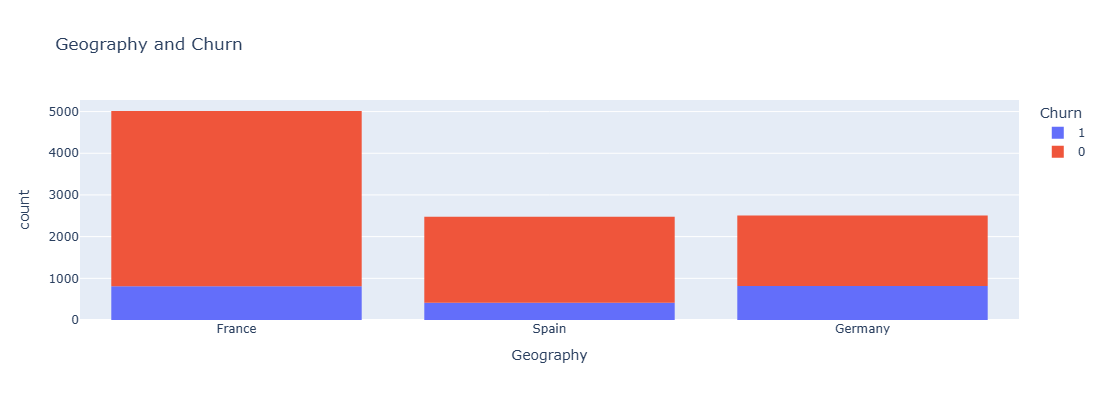

In [54]:
fig = px.histogram(data_frame=df,x='Geography',color='Churn',title='Geography and Churn', width=600,  
    height=400)
fig.show()

The largest share of customers comes from France, followed by Spain and then Germany.

However, when we look at churn counts, the pattern changes:

- Germany has the highest churn rate, meaning German customers are leaving the bank more often.

- France comes next, with a moderate churn count.

- Spain shows the lowest churn count among the three countries.

In plain terms: Even though France has the most customers overall, German customers are more likely to leave compared to customers from other countries.

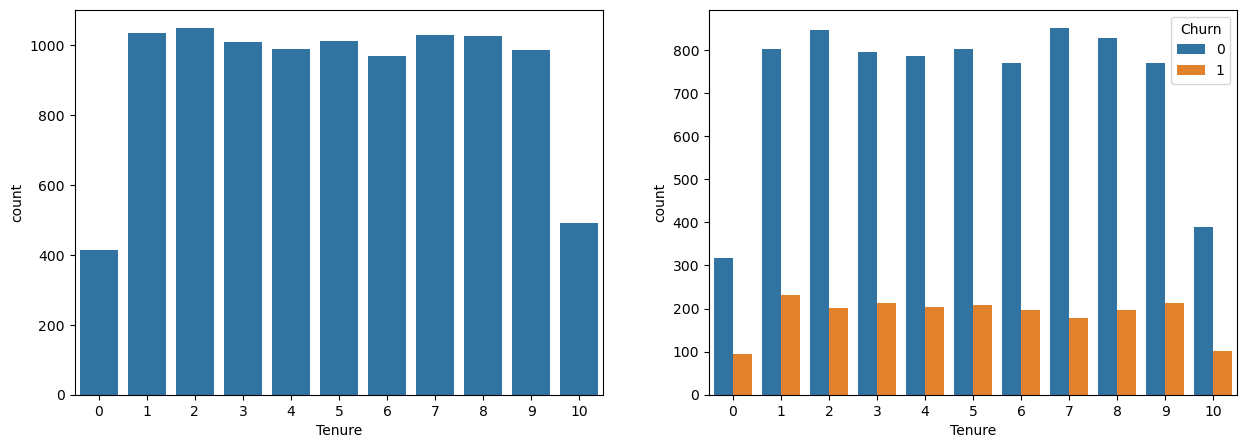

In [56]:

fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=df,ax=ax[1])
plt.show()

Tenure Definition: Tenure refers to the number of years a customer has been with the bank.

Distribution: Most customers fall within the 1–9 year tenure range, with fairly equal distribution across these years.

Low Representation: Very few customers have a tenure of less than 1 year or more than 9 years.

Churn Pattern:

- Customers with 1 year tenure show the highest churn count, followed by those with 9 years tenure.

- Customers in the 1–9 year range overall have higher churn compared to other groups.

- Customers with more than 9 years tenure show the least churn, indicating strong loyalty.

Interpretation: Longer-tenured customers are more loyal and less likely to leave, while newer customers (especially at 1 year) are more vulnerable to churn.

## Customer Bank Balance and Churn Risk

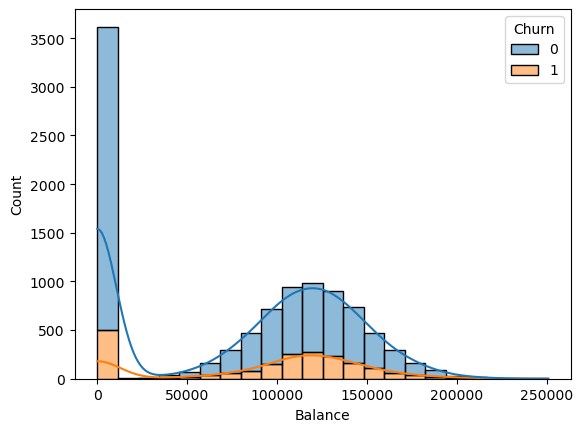

In [62]:

sns.histplot(data=df, x="Balance", hue="Churn", multiple="stack",kde=True)
plt.show()

A large number of customers have zero bank balance, and this group shows the highest churn rate.

Interestingly, customers with balances in the range of 100,000 to 150,000 are also more likely to churn, coming second after the zero-balance group.

Customers with moderate balances (between 1 and 100,000, or above 150,000) show comparatively lower churn rates.

In plain terms: Customers with no balance are most likely to leave, and surprisingly, those with high balances (100k–150k) also show a strong tendency to churn

## Number of Products Purchased and Churn Risk

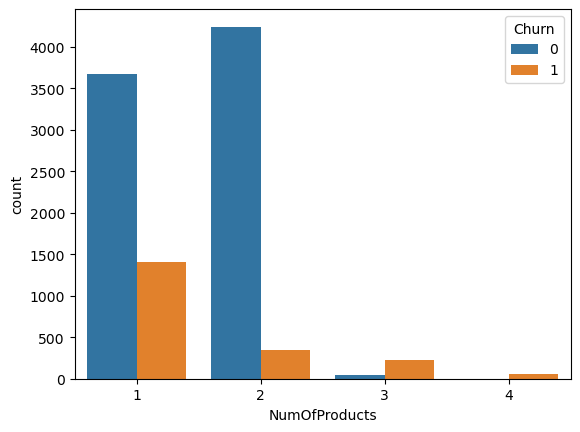

In [66]:
sns.countplot(x='NumOfProducts', hue='Churn', data=df)
plt.show()

Customers with 1–2 products are more stable and loyal.

Customers with 3–4 products may be experiencing complexity, dissatisfaction, or unmet expectations, leading them to leave.

The bank should investigate why multi-product customers are churning — and consider improving product bundling, service quality

## Credit Card Ownership and Churn Risk

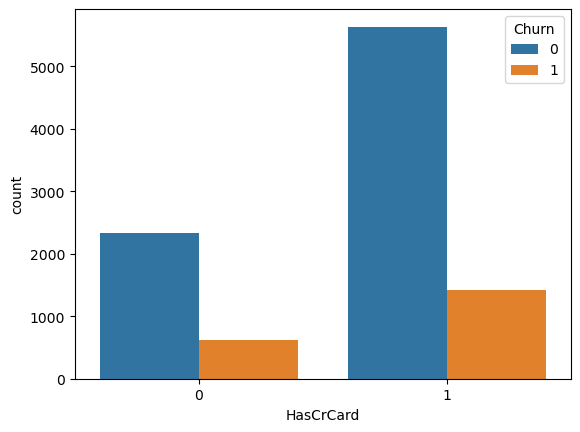

In [70]:
sns.countplot(x=df['HasCrCard'],hue=df['Churn'])
plt.show()

Credit Card Distribution: Nearly **70%** of customers have a credit card, while the remaining **30%** do not.

Churn Pattern: 
- Among customers who do have a credit card, the churn count is higher than among those who don’t.

This suggests that credit card ownership is associated with a higher likelihood of churn, even though it’s the more common group.

## Estimated Salary and Churn Risk

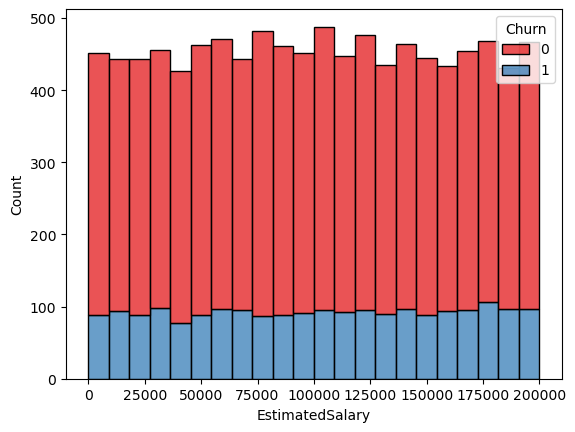

In [75]:

sns.histplot(data=df,x='EstimatedSalary',hue='Churn',multiple='stack',palette='Set1')
plt.show()

This graph displays how customer churn varies across different salary ranges.

Overall, there is no clear pattern linking estimated salary to whether a customer stays or leaves.

Across all income levels — from low to high — the number of non-churned customers consistently exceeds churned customers.

This suggests that estimated salary is not a strong predictor of churn behavior.

## Exploratory Data Analysis Summary
From the analysis, customer churn mainly depends on:

- Age
- Geography
- Tenure (how long they’ve been with the bank)
- Balance
- Number of Products they use
- Credit Card ownership
- Active Membership status

# Data Preprocesssing 2

### Label encoding variables

In [9]:
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


### Normalization

In [10]:

#normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

### Coorelation Matrix Heatmap

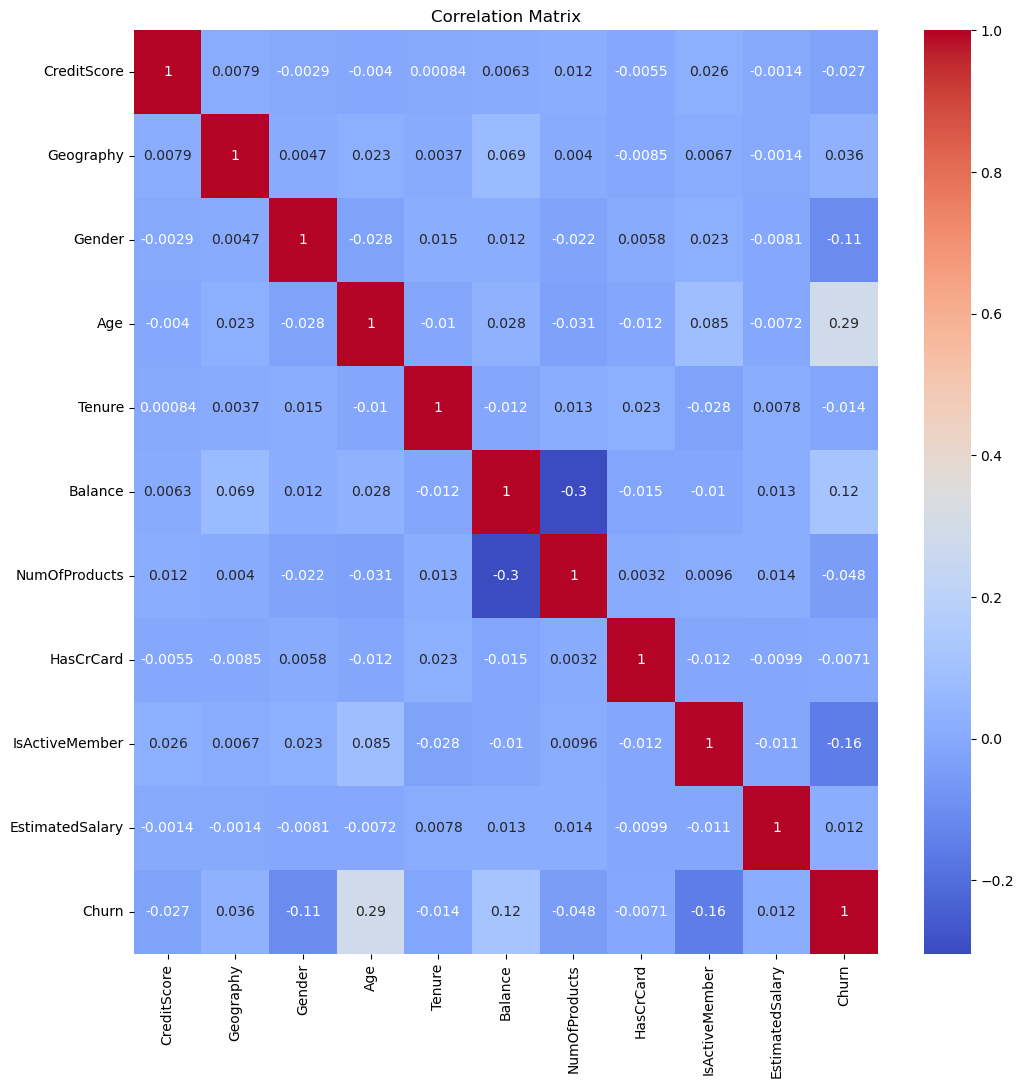

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


There is no significant coorelation among the variables. So, I will proceed to model building.

In [12]:
# Define features and target
x = df.drop('Churn', axis=1)
y = df['Churn']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

# Churn Prediction
For predicting the churn of customers, depending on the data of the customers, we will use the following models:

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier


# Model Buliding

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [15]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.8045714285714286

In [16]:
y_pred_lr = lr.predict(x_test)

## Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#creating Decision Tree Classifer object
dtree = DecisionTreeClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10,12,14,16,18,20],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_dtree = GridSearchCV(dtree, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_dtree.fit(x_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_dtree.best_params_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Best parameters found:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'random_state': 42}


In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=42, min_samples_leaf=10)
dtree

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, random_state=42)

In [19]:
dtree.fit(x_train,y_train)
dtree.score(x_train,y_train)

0.8581428571428571

In [20]:
y_pred_dtree = dtree.predict(x_test)

##  Random Forest Classifier

In [23]:

from sklearn.ensemble import RandomForestClassifier
#creating Random Forest Classifer object
rfc = RandomForestClassifier()

#defining parameter range
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
    }

#Creating grid search object
grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring = 'roc_auc', n_jobs = -1, verbose = 1)

#Fitting the grid search object to the training data
grid_rfc.fit(x_train, y_train)

#Printing the best parameters
print('Best parameters found: ', grid_rfc.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 8, 'random_state': 0}


In [24]:
from sklearn.ensemble import RandomForestClassifier
#creating Random Forest Classifer object
rfc = RandomForestClassifier(min_samples_leaf=8, max_depth=10, random_state=0, criterion='entropy')
rfc

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=8,
                       random_state=0)

In [25]:
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

0.8767142857142857

In [26]:
y_pred_rfc = rfc.predict(x_test)

# Model Evalution

## Logistic Regression

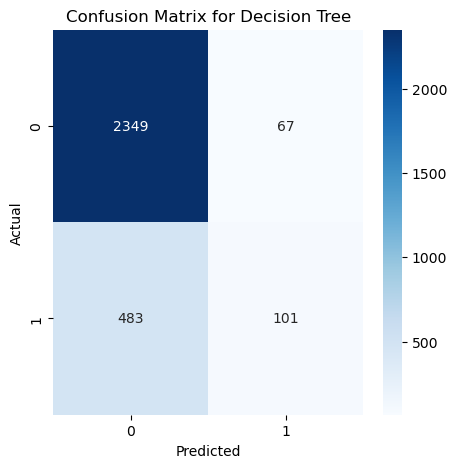

Accuracy: 0.82
Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.60      0.17      0.27       584

    accuracy                           0.82      3000
   macro avg       0.72      0.57      0.58      3000
weighted avg       0.79      0.82      0.77      3000



In [43]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {acc:.2f}")

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_lr))

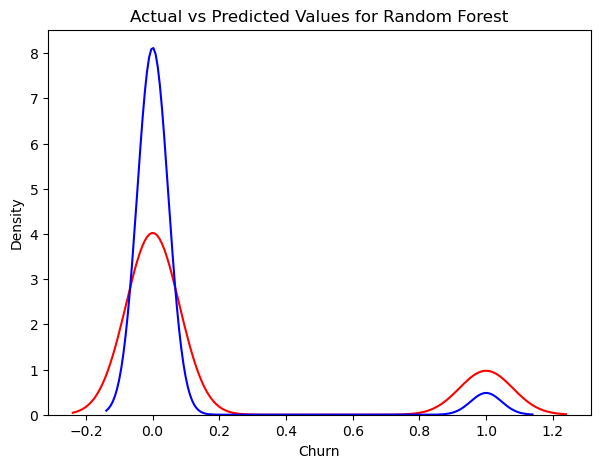

In [47]:
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred_lr,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Random Forest')
plt.xlabel('Churn')
plt.show()

## Decision Tree Classifier

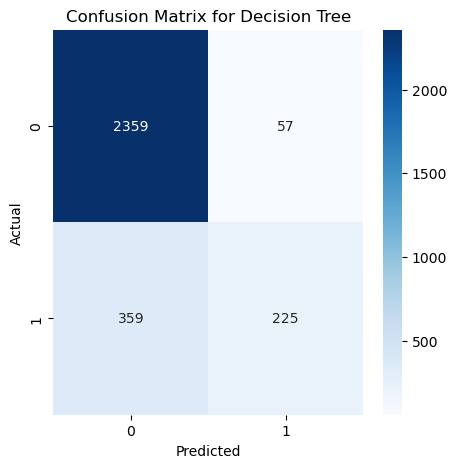

Accuracy: 0.86
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.80      0.39      0.52       584

    accuracy                           0.86      3000
   macro avg       0.83      0.68      0.72      3000
weighted avg       0.85      0.86      0.84      3000



In [45]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred_dtree),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred_dtree)
print(f"Accuracy: {acc:.2f}")

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_dtree))

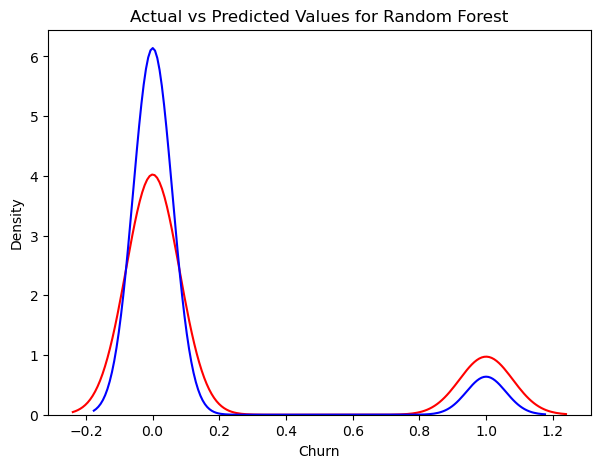

In [69]:
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred_dtree,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Random Forest')
plt.xlabel('Churn')
plt.show()

## Random Forest Classifier

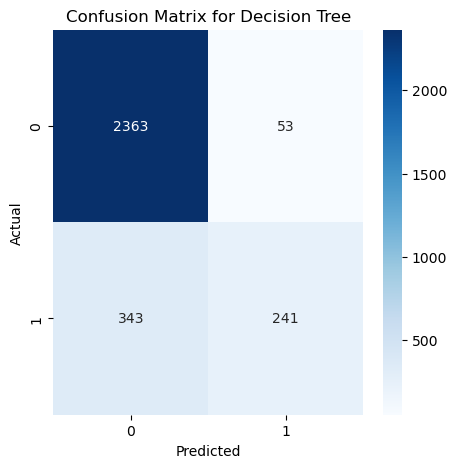

Accuracy: 0.87
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.82      0.41      0.55       584

    accuracy                           0.87      3000
   macro avg       0.85      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [49]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred_rfc),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred_rfc)
print(f"Accuracy: {acc:.2f}")

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred_rfc))

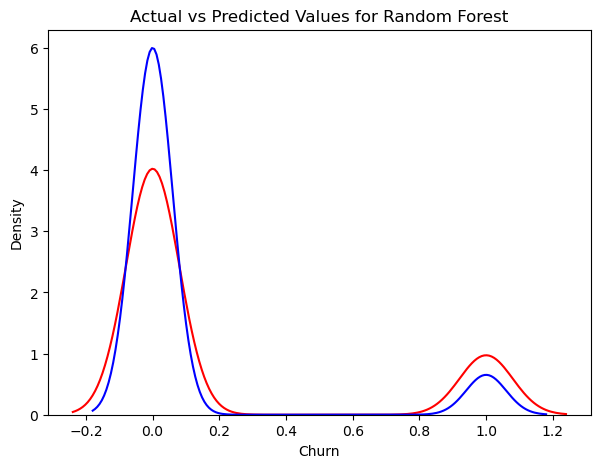

In [50]:
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(y_pred_rfc,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Random Forest')
plt.xlabel('Churn')
plt.show()

# Conclusion

I tested two models: Decision Tree Classifier and Random Forest Classifier, both tuned with GridSearchCV.

While both gave similar accuracy, the Random Forest Classifier performed better overall, especially in terms of precision and reliability compared to the Decision Tree.